## Setup

In [80]:
# imports
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt
import os
import time

from kpca.utils import *
from kpca.kernel_pca import KernelPCA
from kpca.data import Loader, half_moons

# ipython
%matplotlib inline 
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Data

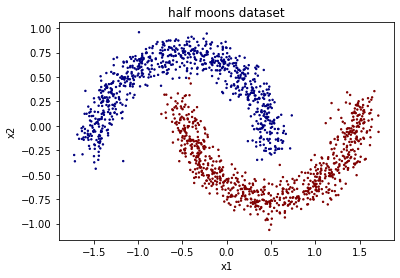

In [235]:
x,labels = half_moons(noise=0.1)
plt.scatter(x[:,0],x[:,1],s=2,c=labels,cmap='jet')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('half moons dataset')
plt.show()

## Load Networks

In [228]:
net = KernelPCA(m=2, n=16, kernel='rbf', sig=0.3, lam=1e-3)
net.load_state_dict(torch.load('./trained-nets/halfmoons-0p3.pt'))

<All keys matched successfully>

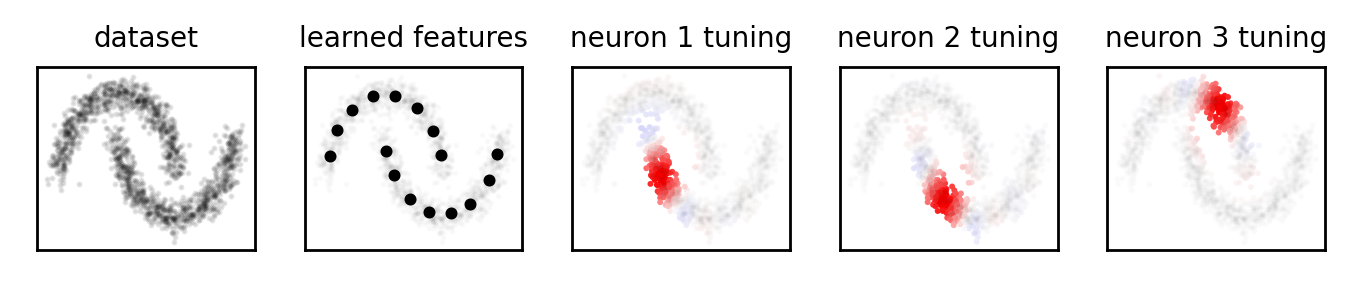

In [285]:
y = net(x)

fontsize=8
plt.figure(figsize=(5.5,1.25),dpi=250)
plt.subplot(151)
# plt.scatter(x[:,0],x[:,1],s=0.5,c=labels,cmap='jet',alpha=0.1)
plt.scatter(x[:,0],x[:,1],s=0.5,color='black',alpha=0.1)

plt.xticks([])
plt.yticks([])
plt.title('dataset', fontsize=fontsize)

plt.subplot(152)
plt.scatter(net.w.detach()[:,0],net.w.detach()[:,1],color='black', s=6, alpha=1.0)
plt.scatter(x.detach()[:,0],x.detach()[:,1],color='black', s=0.5, alpha=0.02)

plt.xticks([])
plt.yticks([])
plt.title('learned features', fontsize=fontsize)

plt.subplot(153)
ix = 0
plt.scatter(x[:,0],x[:,1],s=0.5,c=y[:,ix]/y[:,ix].max(),cmap='bwr',vmin=-1,vmax=1)
plt.scatter(x[:,0],x[:,1],s=0.5,color='black',alpha=0.01)

plt.xticks([])
plt.yticks([])
plt.title('neuron 1 tuning', fontsize=fontsize)

plt.subplot(154)
ix = 1
plt.scatter(x[:,0],x[:,1],s=0.5,c=y[:,ix]/y[:,ix].max(),cmap='bwr',vmin=-1,vmax=1)
plt.scatter(x[:,0],x[:,1],s=0.5,color='black',alpha=0.01)

plt.xticks([])

plt.xticks([])
plt.yticks([])
plt.title('neuron 2 tuning', fontsize=fontsize)

plt.subplot(155)
ix = 2
plt.scatter(x[:,0],x[:,1],s=0.5,c=y[:,ix]/y[:,ix].max(),cmap='bwr',vmin=-1,vmax=1)
plt.scatter(x[:,0],x[:,1],s=0.5,color='black',alpha=0.01)

plt.xticks([])

plt.xticks([])
plt.yticks([])
plt.title('neuron 3 tuning', fontsize=fontsize)

plt.tight_layout()
plt.savefig('figures/halfmoons/half-moons-overview.pdf')
plt.show()

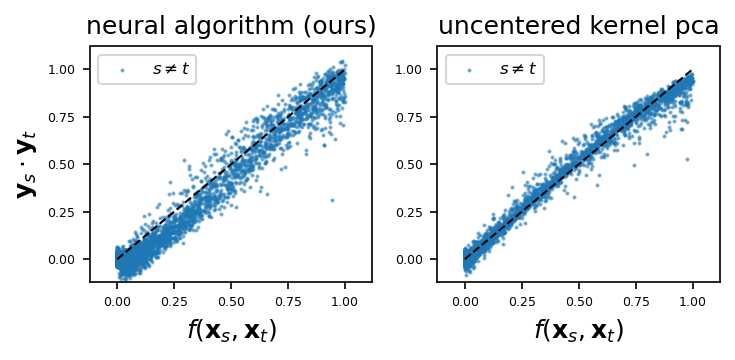

In [289]:
y = net(x)
yy = y @ y.t()
fxx = net.f(x,x)

l,v = fxx.symeig(eigenvectors=True)
z = v[:,-y.shape[1]:] @ l[-y.shape[1]:].sqrt().diag() @ v[:,-y.shape[1]:].t()
zz = z @ z.t()

plt.figure(figsize=(5,2.5),dpi=150)

###########
# alpha = 1
###########
plt.subplot(121)
t = 10000
ixs = torch.randperm(len(offdiag(fxx)))[:t]
plt.scatter(offdiag(fxx).detach().cpu().numpy()[ixs], offdiag(yy).detach().cpu().numpy()[ixs], s=1, alpha=0.5, label=r"$s \neq t$")
# plt.scatter(ondiag(fxx).detach().cpu().numpy(), ondiag(yy).detach().cpu().numpy(), s=1, alpha=0.5, label="$s = t$")
plt.plot(np.linspace(0,fxx.max().item()), np.linspace(0,fxx.max().item()), color='black', linewidth=1, linestyle='--')

plt.xticks(torch.linspace(0,1,5),fontsize=6)
plt.xlim(-0.12,1.12)
plt.yticks(torch.linspace(0,1,5),fontsize=6)
plt.ylim(-0.12,1.12)
plt.legend(fontsize=8)

plt.legend(fontsize=8)
plt.xlabel(r"$f(\mathbf{x}_s,\mathbf{x}_{t})$",fontsize=12)
plt.ylabel(r"$\mathbf{y}_s \cdot \mathbf{y}_{t}$",fontsize=12)
plt.title("neural algorithm (ours)",fontsize=12)

plt.subplot(122)
ixs = torch.randperm(len(offdiag(fxx)))[:t]
plt.scatter(offdiag(fxx).detach().cpu().numpy()[ixs], offdiag(zz).detach().cpu().numpy()[ixs], s=1, alpha=0.5, label=r"$s \neq t$")
# plt.scatter(ondiag(fxx).detach().cpu().numpy(), ondiag(zz).detach().cpu().numpy(), s=1, alpha=0.5, label="$s = t$")
plt.plot(np.linspace(0,fxx.max().item()), np.linspace(0,fxx.max().item()), color='black', linewidth=1, linestyle='--')

plt.xticks(torch.linspace(0,1,5),fontsize=6)
plt.xlim(-0.12,1.12)
plt.yticks(torch.linspace(0,1,5),fontsize=6)
plt.ylim(-0.12,1.12)
plt.legend(fontsize=8)

plt.xlabel(r"$f(\mathbf{x}_s,\mathbf{x}_{t})$",fontsize=12)
# plt.ylabel(r"output similarity $\mathbf{y}_t \cdot \mathbf{y}_{t'}$",fontsize=12)
plt.title("uncentered kernel pca",fontsize=12)

plt.tight_layout()

plt.savefig('./figures/halfmoons/half-moons-matching.pdf')
plt.show()

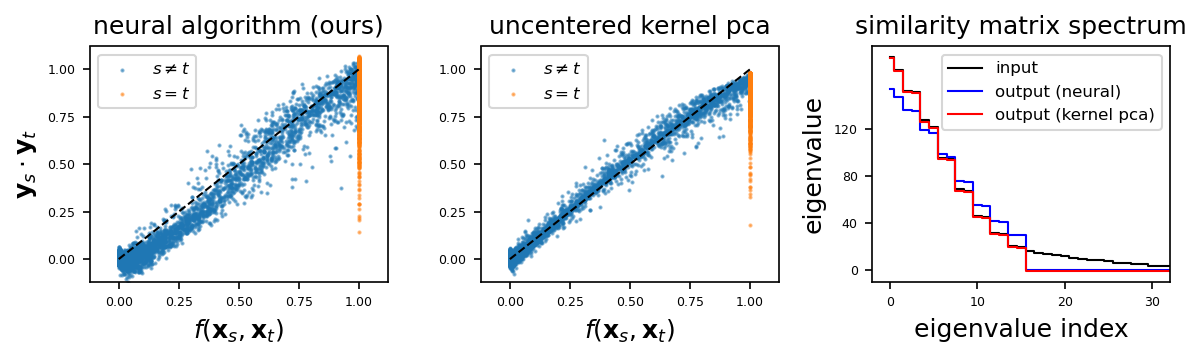

In [284]:
y = net(x)
yy = y @ y.t()
fxx = net.f(x,x)

l,v = fxx.symeig(eigenvectors=True)
z = v[:,-y.shape[1]:] @ l[-y.shape[1]:].sqrt().diag() @ v[:,-y.shape[1]:].t()
zz = z @ z.t()

plt.figure(figsize=(8,2.5),dpi=150)

###########
# alpha = 1
###########
plt.subplot(131)
t = 10000
ixs = torch.randperm(len(offdiag(fxx)))[:t]
plt.scatter(offdiag(fxx).detach().cpu().numpy()[ixs], offdiag(yy).detach().cpu().numpy()[ixs], s=1, alpha=0.5, label=r"$s \neq t$")
plt.scatter(ondiag(fxx).detach().cpu().numpy(), ondiag(yy).detach().cpu().numpy(), s=1, alpha=0.5, label="$s = t$")
plt.plot(np.linspace(0,fxx.max().item()), np.linspace(0,fxx.max().item()), color='black', linewidth=1, linestyle='--')

plt.xticks(torch.linspace(0,1,5),fontsize=6)
plt.xlim(-0.12,1.12)
plt.yticks(torch.linspace(0,1,5),fontsize=6)
plt.ylim(-0.12,1.12)
plt.legend(fontsize=8)

plt.legend(fontsize=8)
plt.xlabel(r"$f(\mathbf{x}_s,\mathbf{x}_{t})$",fontsize=12)
plt.ylabel(r"$\mathbf{y}_s \cdot \mathbf{y}_{t}$",fontsize=12)
plt.title("neural algorithm (ours)",fontsize=12)

plt.subplot(132)
ixs = torch.randperm(len(offdiag(fxx)))[:t]
plt.scatter(offdiag(fxx).detach().cpu().numpy()[ixs], offdiag(zz).detach().cpu().numpy()[ixs], s=1, alpha=0.5, label=r"$s \neq t$")
plt.scatter(ondiag(fxx).detach().cpu().numpy(), ondiag(zz).detach().cpu().numpy(), s=1, alpha=0.5, label="$s = t$")
plt.plot(np.linspace(0,fxx.max().item()), np.linspace(0,fxx.max().item()), color='black', linewidth=1, linestyle='--')

plt.xticks(torch.linspace(0,1,5),fontsize=6)
plt.xlim(-0.12,1.12)
plt.yticks(torch.linspace(0,1,5),fontsize=6)
plt.ylim(-0.12,1.12)
plt.legend(fontsize=8)

plt.xlabel(r"$f(\mathbf{x}_s,\mathbf{x}_{t})$",fontsize=12)
# plt.ylabel(r"output similarity $\mathbf{y}_t \cdot \mathbf{y}_{t'}$",fontsize=12)
plt.title("uncentered kernel pca",fontsize=12)

plt.subplot(133)
plt.plot(fxx.symeig()[0].flip(0), color='black', linewidth=1, drawstyle='steps-mid', label='input')
plt.plot(yy.symeig()[0].flip(0), color='blue', linewidth=1, drawstyle='steps-mid', label='output (neural)')
plt.plot(zz.symeig()[0].flip(0)-1, color='red', linewidth=1, drawstyle='steps-mid', label='output (kernel pca)')

plt.xticks(torch.linspace(0,30,4),fontsize=6)
plt.xlim(-2,32)
plt.yticks(torch.linspace(0,120,4),fontsize=6)
# plt.ylim(-2,122)
plt.legend(fontsize=8)

plt.xlabel(r"eigenvalue index",fontsize=12)
plt.ylabel(r"eigenvalue",fontsize=12)
plt.title("similarity matrix spectrum",fontsize=12)

plt.tight_layout()

plt.savefig('./figures/halfmoons/half-moons-matching.pdf')
plt.show()

## KMeans

In [294]:
from sklearn.cluster import KMeans

seed = 0
y = net(x)
kx = KMeans(n_clusters=2, random_state=seed, n_init=100).fit_predict(x.cpu().numpy())
ky = KMeans(n_clusters=2, random_state=seed, n_init=100).fit_predict(y.cpu().numpy())

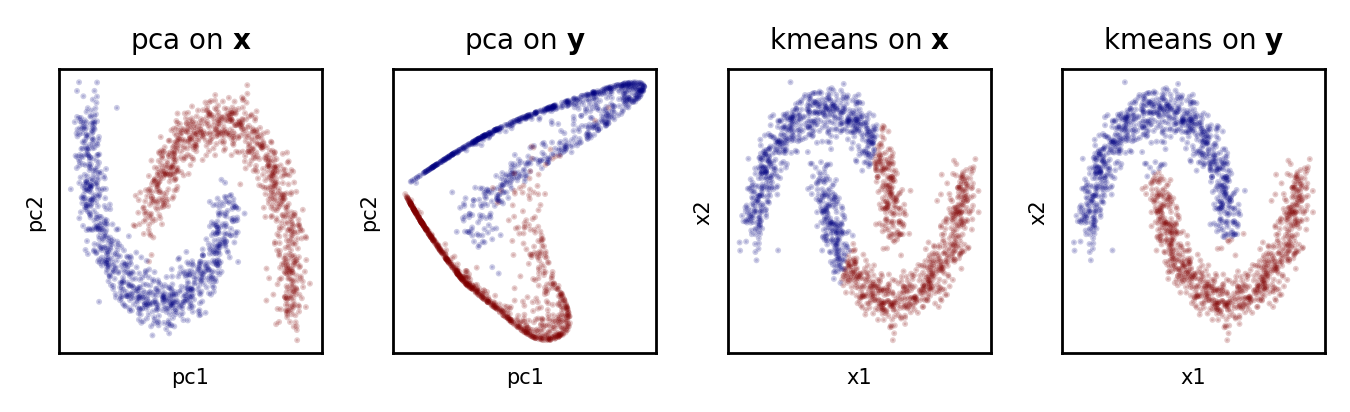

In [295]:
fontsize=8

plt.figure(figsize=(5.5,1.75),dpi=250)
plt.subplot(141)
u = x.svd()[0][:,:2].cpu()
plt.scatter(u[:,0],u[:,1],s=0.5,c=labels,cmap='jet',alpha=0.2)

plt.xticks([])
plt.yticks([])
plt.xlabel('pc1',fontsize=6)
plt.ylabel('pc2',fontsize=6)
plt.title("pca on $\mathbf{x}$", fontsize=fontsize)

plt.subplot(142)
u = y.svd()[0][:,:2].cpu()
plt.scatter(u[:,0],u[:,1],s=0.5,c=labels,cmap='jet',alpha=0.2)

plt.xticks([])
plt.yticks([])
plt.xlabel('pc1',fontsize=6)
plt.ylabel('pc2',fontsize=6)
plt.title("pc's of $\mathbf{y}$", fontsize=fontsize)
plt.title("pca on $\mathbf{y}$", fontsize=fontsize)


plt.subplot(143)
plt.scatter(x[:,0],x[:,1],s=0.5,c=kx,cmap='jet',alpha=0.2)

plt.xticks([])
plt.yticks([])
plt.xlabel('x1',fontsize=6)
plt.ylabel('x2',fontsize=6)
plt.title('kmeans on $\mathbf{x}$', fontsize=fontsize)

plt.subplot(144)
plt.scatter(x[:,0],x[:,1],s=0.5,c=ky,cmap='jet',alpha=0.2)

plt.xticks([])
plt.yticks([])
plt.xlabel('x1',fontsize=6)
plt.ylabel('x2',fontsize=6)
plt.title('kmeans on $\mathbf{y}$', fontsize=fontsize)

plt.tight_layout()
# plt.savefig('./figures/halfmoons/half-moons-kmeans.pdf')
plt.show()